# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 25
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [182]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head(10)

,reviews
0,✅ Trip Verified | I really like flying Briti...
1,✅ Trip Verified | Could not book online the ...
2,✅ Trip Verified | Having had some rough experi...
3,✅ Trip Verified | This comfortable flight wa...
4,✅ Trip Verified | Punta Cana Terminal B chec...
5,✅ Trip Verified | The employee at Venice Air...
6,"✅ Trip Verified | I had only 1 bag with me, ..."
7,✅ Trip Verified | Check in and security at T5 ...
8,Not Verified | LHR T5 BA Gold Wing worked wel...
9,Not Verified | Very good service on this rout...


In [4]:
df.shape

(2500, 1)

In [5]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [186]:
df['reviews']=df['reviews'].str.strip('✅ Trip Verified | ')

In [188]:
df.head(10)

,reviews
0,I really like flying British Airways particula...
1,Could not book online the night before beca...
2,Having had some rough experiences with BA in r...
3,This comfortable flight was BA at its best....
4,Punta Cana Terminal B check in was straightfor...
5,he employee at Venice Airport checkin was very...
6,"I had only 1 bag with me, a carry on trolle..."
7,Check in and security at T5 quick. Both Galler...
8,Not Verified | LHR T5 BA Gold Wing worked wel...
9,Not Verified | Very good service on this rout...


In [32]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()


# Apply sentiment analysis to each row
df["polarity_score"] = df["reviews"].apply(lambda x: sia.polarity_scores(x)["compound"])

print(df)
df["sentiment"] = df["polarity_score"].apply(lambda x: "Positive" if x > 0.05 else ("Negative" if x < -0.05 else "Neutral"))

# Group by sentiment and count occurrences
grouped_df = df.groupby("sentiment").count()

print(grouped_df)



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                reviews  polarity_score
0     I really like flying British Airways particula...          0.9652
1        Could not book online the night before beca...         -0.4767
2     Having had some rough experiences with BA in r...          0.9150
3        This comfortable flight was BA at its best....          0.9954
4     Punta Cana Terminal B check in was straightfor...          0.9953
...                                                 ...             ...
2495  Review |  We were treated incredibly well and ...          0.9606
2496  Review |  I was scheduled to be on BA 114 from...          0.9401
2497  Review |  British Airways from London Heathrow...          0.8232
2498  We flew British Airways BA2678 from Gatwick to...          0.8225
2499  Review |  Flew British Airways London Heathrow...         -0.7543

[2500 rows x 2 columns]
           reviews  polarity_score
sentiment                         
Negative      1169            1169
Neutra

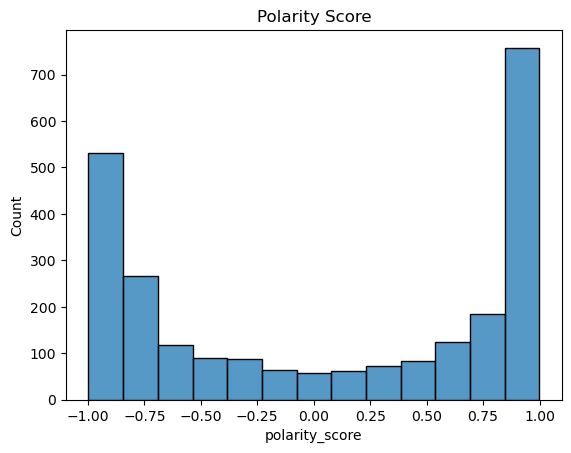

In [170]:
import seaborn as sns
sns.histplot(df['polarity_score'])
plt.title('Polarity Score')
plt.show()

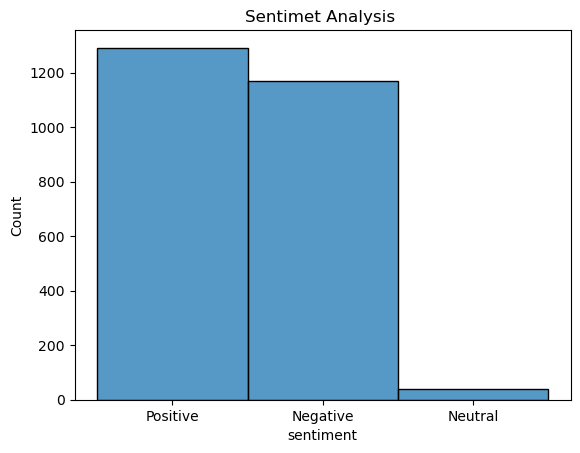

In [168]:
sns.histplot(df['sentiment'])
plt.title('Sentimet Analysis ')
plt.show()

# Sentiment Analysis
1.The sentiment has three categories Positive , Negative and Neutral .

2.The Person with positive Reviews are most followed by negative reviews. The neutral reviews are nominal as compared to both.

3. Positive and Negative reviews has small difference.

In [60]:
grouped_df.head()

,reviews,polarity_score
sentiment,,
Negative,1169,1169
Neutral,39,39
Positive,1292,1292


The dataset has total of 2500 reviews in which 1292 are positive , 1169 are negative and 39 are neutral

In [40]:
total=grouped_df['reviews'].sum()
total

2500

In [86]:
Percentage= ((df['sentiment']).value_counts()/total)*100
Percentage

sentiment
Positive    51.68
Negative    46.76
Neutral      1.56
Name: count, dtype: float64

The total percentage of the positive review is 51.68%

The total Percentage of the negative review is 46.78%

The total percentage of neutral review is 1.56%

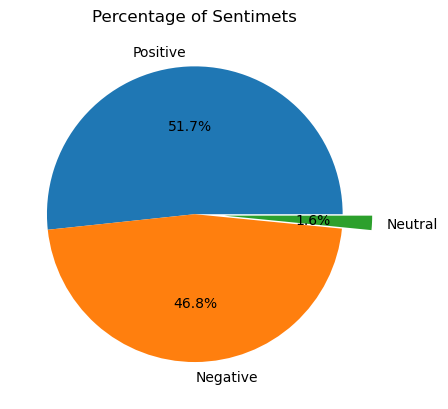

In [166]:
import matplotlib.pyplot as plt
plt.pie(Percentage,  autopct='%1.1f%%', labels=['Positive','Negative','Neutral'], explode = (0, 0, 0.2))
plt.title("Percentage of Sentimets")
plt.show()

Text(0.5, 1.0, 'Polarity_ score')

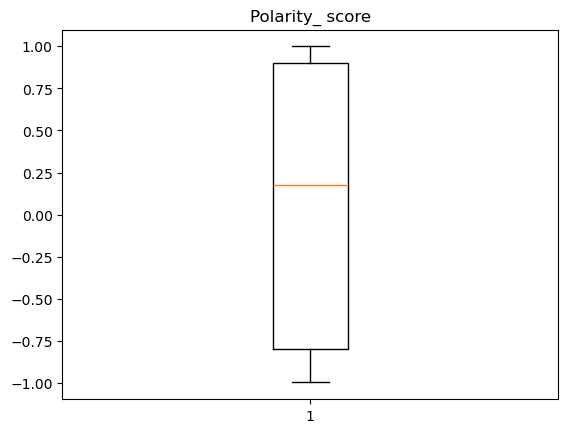

In [156]:
plt.boxplot(df['polarity_score'])
plt.title('Polarity_ score')

In this dataset there is no any outlier 